In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [24]:
data = pd.read_csv('/content/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [25]:
data.shape

(31780, 31)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31780 entries, 0 to 31779
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    31780 non-null  int64  
 1   V1      31780 non-null  float64
 2   V2      31780 non-null  float64
 3   V3      31780 non-null  float64
 4   V4      31780 non-null  float64
 5   V5      31780 non-null  float64
 6   V6      31780 non-null  float64
 7   V7      31779 non-null  float64
 8   V8      31779 non-null  float64
 9   V9      31779 non-null  float64
 10  V10     31779 non-null  float64
 11  V11     31779 non-null  float64
 12  V12     31779 non-null  float64
 13  V13     31779 non-null  float64
 14  V14     31779 non-null  float64
 15  V15     31779 non-null  float64
 16  V16     31779 non-null  float64
 17  V17     31779 non-null  float64
 18  V18     31779 non-null  float64
 19  V19     31779 non-null  float64
 20  V20     31779 non-null  float64
 21  V21     31779 non-null  float64
 22

In [28]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31780.000000,31779.000000,31779.000000,31779.000000,...,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000,31779.000000
mean,22329.432410,-0.212640,0.104667,0.721370,0.211236,-0.209710,0.088247,-0.120162,0.031883,0.314021,...,-0.033146,-0.119157,-0.040436,0.008409,0.134365,0.022637,0.012911,0.003384,81.115001,0.003210
std,12184.540274,1.854714,1.547456,1.589832,1.420692,1.408421,1.314428,1.283076,1.264390,1.250651,...,0.778376,0.640252,0.539220,0.591869,0.435709,0.508922,0.390404,0.300394,223.154481,0.056564
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,10971.000000,-0.956800,-0.467657,0.257092,-0.702958,-0.807339,-0.651105,-0.597343,-0.159243,-0.482553,...,-0.242905,-0.541636,-0.177032,-0.326931,-0.128724,-0.333026,-0.063132,-0.007594,6.790000,0.000000
50%,27331.000000,-0.246371,0.135141,0.842625,0.198585,-0.243626,-0.167815,-0.071105,0.038210,0.196750,...,-0.087460,-0.094216,-0.050669,0.062628,0.173028,-0.059277,0.008684,0.020795,20.000000,0.000000
75%,32942.000000,1.164230,0.776101,1.468823,1.095675,0.308333,0.474682,0.441280,0.298470,1.063590,...,0.087763,0.289984,0.075411,0.398097,0.417497,0.301347,0.089173,0.076435,73.705000,0.000000
max,36513.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [30]:
# Cheking percent of missing values in columns
data_missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
data_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [31]:
classes = data['Class'].value_counts()
classes

,count
Class,
0.0,31677
1.0,102


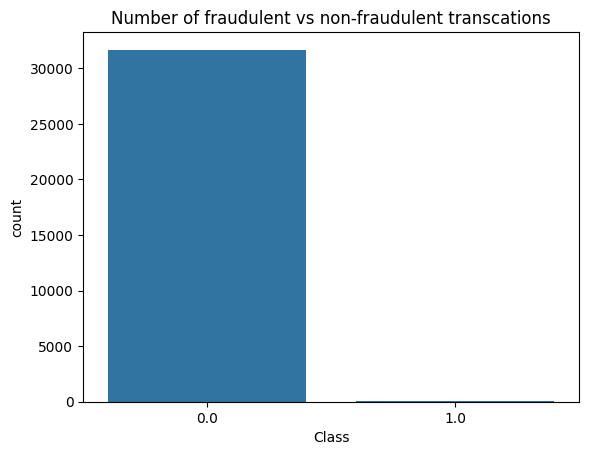

In [32]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=data)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

In [4]:
X = data.drop(columns=['Class'])
y = data['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7051,9242,0.720616,-1.206439,0.837777,-0.763449,-1.611881,-0.936542,-0.319289,-0.287772,3.021197,...,0.488836,0.162636,0.406890,-0.307065,0.779556,0.351934,0.022382,-0.026323,0.070426,279.00
10303,16266,-0.658234,1.210862,1.168147,-0.013270,0.422688,-0.005415,0.359856,0.204094,0.949485,...,0.148754,-0.393612,-0.790989,0.000223,-0.443601,-0.212817,0.072904,0.329542,0.142688,6.25
6740,8463,-1.659875,0.386499,3.934998,3.211911,0.214577,2.377242,-0.945849,0.306652,2.449614,...,0.572269,-0.281458,1.001948,-0.549951,-0.259485,0.092977,0.491857,0.329631,-0.278994,1.67
9586,14421,-0.832451,1.014867,2.236497,0.414555,0.287894,-1.234486,0.743860,-0.219901,0.602958,...,-0.088172,-0.237494,-0.584112,-0.004267,0.823933,0.007222,-0.833311,0.050154,0.111874,9.22
8593,11589,-2.141436,-1.875038,1.841155,-0.070644,1.821235,-2.134175,-0.982009,0.103642,1.845683,...,0.452994,0.031542,-0.280573,0.329505,0.378863,-0.037135,0.892478,-0.106603,0.143877,44.10


In [38]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
2019,1559,1.181015,0.183850,0.699030,0.700274,-0.595810,-0.839532,-0.038642,-0.073295,0.078477,...,-0.175242,-0.200933,-0.571252,0.238454,0.587858,0.057450,0.092996,-0.014880,0.019808,0.89
9438,13915,-3.640776,0.740725,0.832858,0.484796,-1.829981,0.372554,-0.743923,1.291120,1.708930,...,-1.014493,-0.337708,-0.260125,0.196263,-0.035126,0.357282,0.327464,-0.335829,-0.141549,136.02
5709,6000,-0.123583,1.349227,1.586235,2.863087,0.186651,0.311037,0.206646,0.162382,-0.076605,...,0.147467,-0.152079,-0.159369,-0.055811,-0.093973,-0.410792,0.088325,0.303111,0.118106,4.61
12264,21424,1.155512,0.017170,0.300475,0.100260,-0.021772,0.112933,-0.258075,0.078982,1.160654,...,-0.167904,-0.066278,0.087403,0.019467,-0.279392,0.176493,1.042206,-0.091206,-0.022874,13.55
5403,5360,1.012633,0.185475,1.857025,2.625659,-0.813666,0.741190,-1.050536,0.411454,1.078232,...,-0.240510,0.167710,0.665263,0.034245,0.149376,0.061459,0.073727,0.024627,0.023361,12.14


In [8]:
# Check for NaN values in target variable y_train
print(f"Missing values in y_train: {y_train.isnull().sum()}")

# If there are any NaN values, drop those rows from both X_train and y_train
if y_train.isnull().sum() > 0:
    print("Handling missing values in y_train...")
    # Drop rows with NaN in target variable y_train
    X_train = X_train[y_train.notnull()]
    y_train = y_train.dropna()

# After handling NaN values, try SMOTE again
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after resampling
print(f"Class distribution in resampled y_train: {y_train_resampled.value_counts()}")


Missing values in y_train: 1
Handling missing values in y_train...
Class distribution in resampled y_train: Class
0.0    11116
1.0    11116
Name: count, dtype: int64


In [9]:
# Optionally scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Logistic Regression with Class Weight
logistic_model = LogisticRegression(class_weight='balanced', random_state=42)
logistic_model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(class_weight='balanced', random_state=42)

In [11]:
# Evaluate the Logistic Regression model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Precision-Recall AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print("Precision-Recall AUC: ", pr_auc)


Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2781
         1.0       0.44      0.80      0.57        10

    accuracy                           1.00      2791
   macro avg       0.72      0.90      0.78      2791
weighted avg       1.00      1.00      1.00      2791



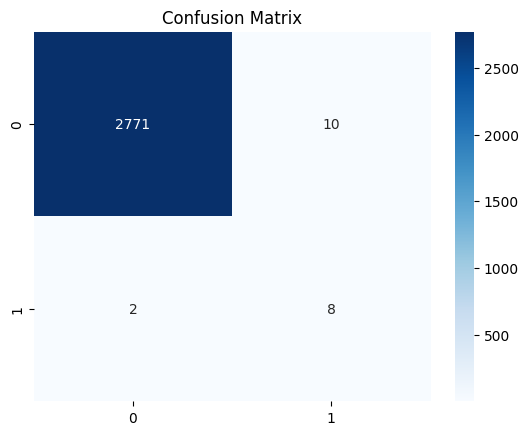

Precision-Recall AUC:  0.6407985100894338


In [12]:
# Evaluate Logistic Regression model
print("Logistic Regression:")
evaluate_model(logistic_model, X_test_scaled, y_test)

In [13]:
# Random Forest with Class Weight
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_scaled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)


Random Forest:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2781
         1.0       0.89      0.80      0.84        10

    accuracy                           1.00      2791
   macro avg       0.94      0.90      0.92      2791
weighted avg       1.00      1.00      1.00      2791



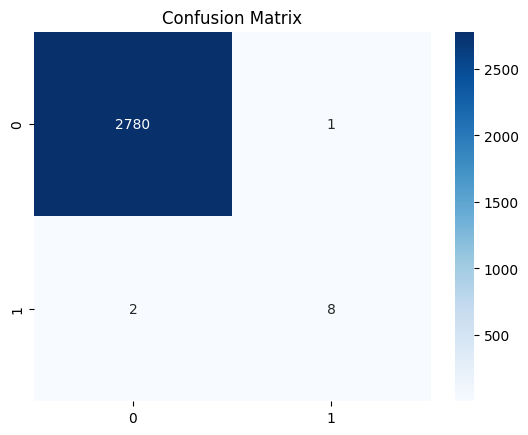

Precision-Recall AUC:  0.8037770979368973


In [14]:
# Evaluate Random Forest model
print("\nRandom Forest:")
evaluate_model(rf_model, X_test_scaled, y_test)

In [15]:
# XGBoost with Class Weight (Scale Positive Weight)
class_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_model = xgb.XGBClassifier(scale_pos_weight=class_ratio, random_state=42)
xgb_model.fit(X_train_scaled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


XGBoost:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2781
         1.0       0.90      0.90      0.90        10

    accuracy                           1.00      2791
   macro avg       0.95      0.95      0.95      2791
weighted avg       1.00      1.00      1.00      2791



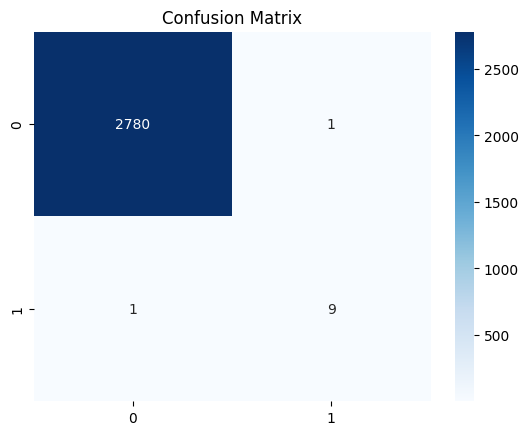

Precision-Recall AUC:  0.9798989898989899


In [16]:
# Evaluate XGBoost model
print("\nXGBoost:")
evaluate_model(xgb_model, X_test_scaled, y_test)

In [20]:
# Hyperparameter Tuning for Random Forest using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, cv=3, n_iter=10, random_state=42)
grid_search.fit(X_train_scaled, y_train_resampled)

print("\nBest Hyperparameters for Random Forest:")
print(grid_search.best_params_)


Best Hyperparameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}


In [21]:
# Ensemble Model (Voting Classifier with Logistic Regression and Random Forest)
voting_clf = VotingClassifier(estimators=[('lr', logistic_model), ('rf', rf_model)], voting='soft')
voting_clf.fit(X_train_scaled, y_train_resampled)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced',
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42))],
                 voting='soft')


Voting Classifier:
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2781
         1.0       0.57      0.80      0.67        10

    accuracy                           1.00      2791
   macro avg       0.79      0.90      0.83      2791
weighted avg       1.00      1.00      1.00      2791



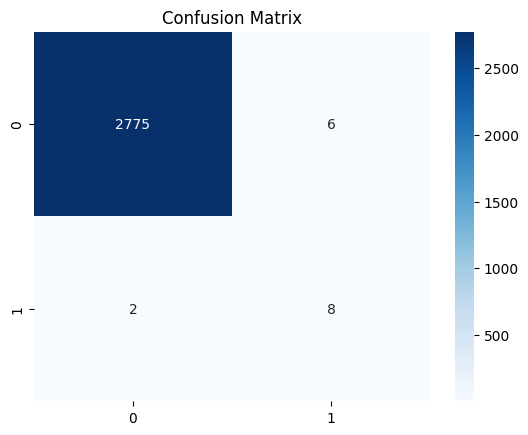

Precision-Recall AUC:  0.8018826557532097


In [22]:
# Evaluate Voting Classifier
print("\nVoting Classifier:")
evaluate_model(voting_clf, X_test_scaled, y_test)